In [1]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import time
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Datasets

In [2]:
df1 = pd.read_csv("Cardekho_cars.csv")
df2 = pd.read_csv("Car_features.csv")
print(df1.shape)
print(df2.shape)

(11164, 8)
(11164, 17)


In [3]:
df1.head()

,Unnamed: 0,ID,Car_Name,Fuel_type,Running_in_kms,color,City_url,Car_price
0,0,0,2012 Maruti Alto K10,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh
1,1,1,2016 Maruti Wagon R,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh
2,2,2,2011 Honda City,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh
3,3,3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh
4,4,4,2012 Maruti Eeco,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh


In [4]:
df2.head()

,Unnamed: 0,ID,Car_Name,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed
0,0,0,2012 Maruti Alto K10,998,Manual,20.92 kmpl,5,67.1,Ventilated Disc,Drum,NaN,1460,1475,3620,1185,8,NaN
1,1,1,2016 Maruti Wagon R,998,Manual,21.79 kmpl,5,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,9,NaN
2,2,2,2011 Honda City,1497,Manual,17 kmpl,5,115.64,Disc,Drum,506 litres,1480,1695,4420,-,8.5,NaN
3,3,3,2019 Maruti Swift Dzire,1197,Manual,21.21 kmpl,5,81.8,Disc,Drum,378,1515,1735,3995,1315Kg,10,NaN
4,4,4,2012 Maruti Eeco,1196,Manual,16.11 kmpl,5,72.42,Disc,Drum,540,1825,1475,3675,1510,-,NaN


In [5]:
#Remove Unwanted column
df1.drop(columns=['Unnamed: 0'], inplace = True)
df2.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
df = pd.merge(df1, df2, on=['ID','Car_Name'])

In [7]:
df

,ID,Car_Name,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,...,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed
0,0,2012 Maruti Alto K10,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998,Manual,20.92 kmpl,...,67.1,Ventilated Disc,Drum,NaN,1460,1475,3620,1185,8,NaN
1,1,2016 Maruti Wagon R,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998,Manual,21.79 kmpl,...,67.05,Disc,Drum,341 Litres,1675,1620,3655,1340,9,NaN
2,2,2011 Honda City,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497,Manual,17 kmpl,...,115.64,Disc,Drum,506 litres,1480,1695,4420,-,8.5,NaN
3,3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197,Manual,21.21 kmpl,...,81.8,Disc,Drum,378,1515,1735,3995,1315Kg,10,NaN
4,4,2012 Maruti Eeco,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196,Manual,16.11 kmpl,...,72.42,Disc,Drum,540,1825,1475,3675,1510,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,11159,2013 Mahindra Scorpio,Diesel,"79,000 kms",White,https://www.cardekho.com/used-cars+in+pune,5.8 Lakh,2523,Manual,14.0 kmpl,...,75,Disc,Drum,-,1916,1817,4430,2510,-,-
11160,11160,2009 Mercedes-Benz New C-Class,Petrol,"84,000 kms",Grey,https://www.cardekho.com/used-cars+in+pune,5.5 Lakh,1796,Manual,11.74 kmpl,...,186,Ventilated Disc,Solid Disc,-,1447,1770,4591,2020,-,230km/hr
11161,11161,2018 Maruti Swift Dzire Tour,Petrol,"41,210 kms",Grey,https://www.cardekho.com/used-cars+in+pune,6.7 Lakh,1197,Manual,19.0 kmpl,...,85.8,Ventilated Disc,Drum,-,-,-,-,-,-,169 kmph
11162,11162,2017 Honda WR-V,Diesel,"17,000 kms",Premium Amber Metal,https://www.cardekho.com/used-cars+in+pune,8.75 Lakh,1498,Manual,25.5 kmpl,...,98.6,Ventilated Disc,Drum,-,1601,1734,3999,-,-,176 kmph


In [8]:
#check for duplicates
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11164 entries, 0 to 11163
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 11164 non-null  int64 
 1   Car_Name           11164 non-null  object
 2   Fuel_type          11164 non-null  object
 3   Running_in_kms     11164 non-null  object
 4   color              11164 non-null  object
 5   City_url           11164 non-null  object
 6   Car_price          11164 non-null  object
 7   Endine_disp        11164 non-null  object
 8   Gear_transmission  11164 non-null  object
 9   Milage_in_km/ltr   11164 non-null  object
 10  Seating_cap        11133 non-null  object
 11  Max_power          11159 non-null  object
 12  front_brake_type   11123 non-null  object
 13  rear_brake_type    11123 non-null  object
 14  cargo_volume       11008 non-null  object
 15  height             11133 non-null  object
 16  width              11133 non-null  objec

In [10]:
#lets check missing data
df.isnull().sum()

ID                     0
Car_Name               0
Fuel_type              0
Running_in_kms         0
color                  0
City_url               0
Car_price              0
Endine_disp            0
Gear_transmission      0
Milage_in_km/ltr       0
Seating_cap           31
Max_power              5
front_brake_type      41
rear_brake_type       41
cargo_volume         156
height                31
width                 31
length                31
Weight                23
Insp_score             0
top_speed            951
dtype: int64

We can observe many null values are presents in our data. Instead of these null values there are some more values in our data set with '-' mark as well as with text 'null '. we will treat them as null values

In [11]:
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

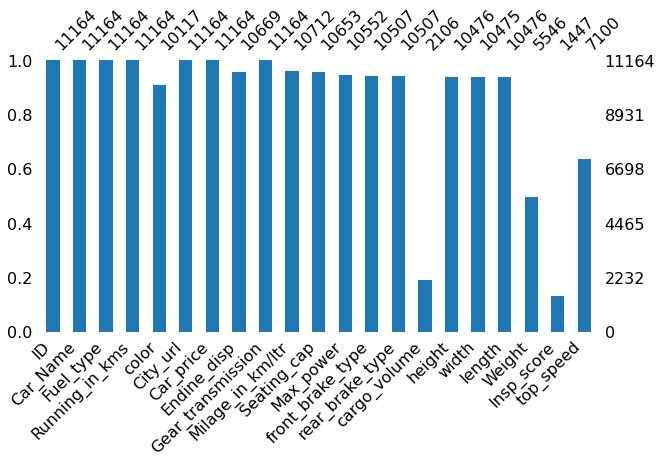

In [12]:
missingno.bar(df, figsize = (10,5), color="tab:blue")
plt.show()

In [13]:
#check missing data
percent_missing = round(df.isnull().sum() * 100 / len(df))
#missing_value_df = pd.DataFrame({'column_name': df.columns,
  #                               'percent_missing': percent_missing})
percent_missing

ID                    0.0
Car_Name              0.0
Fuel_type             0.0
Running_in_kms        0.0
color                 9.0
City_url              0.0
Car_price             0.0
Endine_disp           4.0
Gear_transmission     0.0
Milage_in_km/ltr      4.0
Seating_cap           5.0
Max_power             5.0
front_brake_type      6.0
rear_brake_type       6.0
cargo_volume         81.0
height                6.0
width                 6.0
length                6.0
Weight               50.0
Insp_score           87.0
top_speed            36.0
dtype: float64

As the columns cargo_volume and Insp_score are having more than 80% of null values; So I am dropping these columns

And we don't want ID column for classification task; so I will drop this column as well

In [14]:
df.drop(columns = ['cargo_volume','Insp_score','ID'], inplace = True)

In [15]:
df.head()

,Car_Name,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed
0,2012 Maruti Alto K10,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998,Manual,20.92 kmpl,5,67.1,Ventilated Disc,Drum,1460,1475,3620,1185,NaN
1,2016 Maruti Wagon R,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998,Manual,21.79 kmpl,5,67.05,Disc,Drum,1675,1620,3655,1340,NaN
2,2011 Honda City,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497,Manual,17 kmpl,5,115.64,Disc,Drum,1480,1695,4420,NaN,NaN
3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197,Manual,21.21 kmpl,5,81.8,Disc,Drum,1515,1735,3995,1315Kg,NaN
4,2012 Maruti Eeco,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196,Manual,16.11 kmpl,5,72.42,Disc,Drum,1825,1475,3675,1510,NaN


I have observed lot of null values from same rows in my data, which may give us trouble in model building, so I will drop some data where column color is having null values, by which we will lose arround 1047 entries but it will lead to a better model.

In [16]:
df.dropna(subset = ['color'], inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [17]:
#check percentage missing data
percent_missing = round(df.isnull().sum() * 100 / len(df))
percent_missing

Car_Name              0.0
Fuel_type             0.0
Running_in_kms        0.0
color                 0.0
City_url              0.0
Car_price             0.0
Endine_disp           0.0
Gear_transmission     0.0
Milage_in_km/ltr      0.0
Seating_cap           1.0
Max_power             1.0
front_brake_type      2.0
rear_brake_type       2.0
height                2.0
width                 2.0
length                2.0
Weight               48.0
top_speed            34.0
dtype: float64

## Data-Processing

In target variable there are some string values like 'Lakh', 'Cr' and ','. I will replace 'Lakh' by 100000 and 'Cr' with 10000000 and comma by empty place. then I will split it into two columns and after that multiply these two columns to get exact car price in numerical format

In [18]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

df[['a','b']] = df.car_price.str.split(expand=True)
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [19]:
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
color                   0
City_url                0
Car_price               0
Endine_disp            39
Gear_transmission       0
Milage_in_km/ltr        1
Seating_cap            56
Max_power             140
front_brake_type      184
rear_brake_type       184
height                212
width                 213
length                212
Weight               4875
top_speed            3420
car_price               0
a                       0
b                      83
dtype: int64

In [20]:
df['b']=df['b'].fillna(value = 1)
df['car_price'] = df['a'] * df['b']

In [21]:
df.head()

,Car_Name,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,...,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,car_price,a,b
0,2012 Maruti Alto K10,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998,Manual,20.92 kmpl,5,...,Ventilated Disc,Drum,1460,1475,3620,1185,NaN,177000.0,1.77,100000.0
1,2016 Maruti Wagon R,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998,Manual,21.79 kmpl,5,...,Disc,Drum,1675,1620,3655,1340,NaN,360000.0,3.60,100000.0
2,2011 Honda City,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497,Manual,17 kmpl,5,...,Disc,Drum,1480,1695,4420,NaN,NaN,399000.0,3.99,100000.0
3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197,Manual,21.21 kmpl,5,...,Disc,Drum,1515,1735,3995,1315Kg,NaN,665000.0,6.65,100000.0
4,2012 Maruti Eeco,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196,Manual,16.11 kmpl,5,...,Disc,Drum,1825,1475,3675,1510,NaN,279000.0,2.79,100000.0


In [22]:
print("Maximum Car Price: ",df.car_price.max())
print("Minimum Car Price:",df.car_price.min())
print("Mean: ",df.car_price.mean())
print("Median",np.median(df.car_price))

#df.car_price.describe()

Maximum Car Price:  22500000.0
Minimum Car Price: 45000.0
Mean:  810685.0054363941
Median 535000.0


<AxesSubplot:xlabel='car_price', ylabel='Density'>

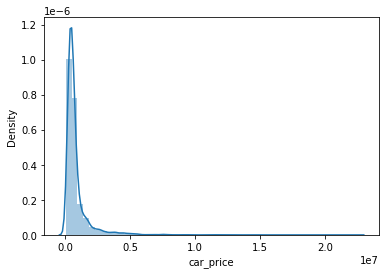

In [23]:
sns.distplot(df['car_price'])

In [24]:
df.describe()

,car_price,a,b
count,1.011700e+04,10117.000000,1.011700e+04
mean,8.106850e+05,668.007277,1.128793e+05
std,1.033043e+06,7393.770260,3.681803e+05
min,4.500000e+04,1.000000,1.000000e+00
25%,3.500000e+05,3.550000,1.000000e+05
50%,5.350000e+05,5.400000,1.000000e+05
75%,8.140000e+05,8.250000,1.000000e+05
max,2.250000e+07,99000.000000,1.000000e+07


### Creating Target Variable from car_price

Here I am deviding Cars in two class as Cars Those are in our budget and not in our budget based on the car price

In [25]:
#Lets Assume our budget is 500000
df.loc[df['car_price']<= 500000, 'Label'] = 'In budget'
df.loc[df['car_price']> 500000, 'Label'] = 'Not in budget'

In [26]:
df.head()

,Car_Name,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,...,rear_brake_type,height,width,length,Weight,top_speed,car_price,a,b,Label
0,2012 Maruti Alto K10,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998,Manual,20.92 kmpl,5,...,Drum,1460,1475,3620,1185,NaN,177000.0,1.77,100000.0,In budget
1,2016 Maruti Wagon R,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998,Manual,21.79 kmpl,5,...,Drum,1675,1620,3655,1340,NaN,360000.0,3.60,100000.0,In budget
2,2011 Honda City,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497,Manual,17 kmpl,5,...,Drum,1480,1695,4420,NaN,NaN,399000.0,3.99,100000.0,In budget
3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197,Manual,21.21 kmpl,5,...,Drum,1515,1735,3995,1315Kg,NaN,665000.0,6.65,100000.0,Not in budget
4,2012 Maruti Eeco,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196,Manual,16.11 kmpl,5,...,Drum,1825,1475,3675,1510,NaN,279000.0,2.79,100000.0,In budget


In [27]:
df.drop(columns=['a','b'], inplace=True)

In [28]:
#value count for target 
df.Label.value_counts()

Not in budget    5423
In budget        4694
Name: Label, dtype: int64

### Car_Name

As the column ‘Car_Name’ is containing the Manufactured
year, Brand name as well as the model of the car; I will create three different columns for these respective features by using ‘Car_Name’

In [29]:
df.Car_Name.sample(5)

2791          2017 Hyundai i20
9964      2016 Mahindra XUV500
8493         2018 Maruti Ignis
10096    2013 Mahindra Scorpio
530         2013 Hyundai Verna
Name: Car_Name, dtype: object

In [30]:
df['Make_year'] = df['Car_Name'].str[0:4]
df['car_names'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [31]:
df['Brand'] = df.car_names.str.split(' ').str.get(1)
df['Model'] = df.car_names.str.split(' ').str[2:]

In [32]:
df['Model'].sample(5)

7124     [Glanza]
3322        [i20]
7865    [Elantra]
3564      [Civic]
7810     [Innova]
Name: Model, dtype: object

In [33]:
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'].sample(5)

4549    Grand,i10
1985          i10
5928     EcoSport
1809          SX4
9659        Swift
Name: Model, dtype: object

In [34]:
df['Model'] = df['Model'].str.replace(',',' ')
df['Model'].sample(5)

2249          Rapid
6580     Etios Liva
8016          Verna
4030    Swift Dzire
7879     i20 Active
Name: Model, dtype: object

In [35]:
#lets check the data set now
df.head()

,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,Max_power,...,width,length,Weight,top_speed,car_price,Label,Make_year,car_names,Brand,Model
0,Petrol,"89,579 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998,Manual,20.92 kmpl,5,67.1,...,1475,3620,1185,NaN,177000.0,In budget,2012,Maruti Alto K10,Maruti,Alto K10
1,Petrol,"81,674 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998,Manual,21.79 kmpl,5,67.05,...,1620,3655,1340,NaN,360000.0,In budget,2016,Maruti Wagon R,Maruti,Wagon R
2,Petrol,"38,647 kms",Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497,Manual,17 kmpl,5,115.64,...,1695,4420,NaN,NaN,399000.0,In budget,2011,Honda City,Honda,City
3,Petrol,"9,718 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197,Manual,21.21 kmpl,5,81.8,...,1735,3995,1315Kg,NaN,665000.0,Not in budget,2019,Maruti Swift Dzire,Maruti,Swift Dzire
4,Petrol,"57,341 kms",White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196,Manual,16.11 kmpl,5,72.42,...,1475,3675,1510,NaN,279000.0,In budget,2012,Maruti Eeco,Maruti,Eeco


### Running_in_kms

In [36]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','').str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

In [37]:
df['Running_in_kms'].sample(5)

2034    23000.0
5336    96000.0
6299    79000.0
9054     9779.0
7385     2800.0
Name: Running_in_kms, dtype: float64

In [38]:
df.Endine_disp = df.Endine_disp.astype('float')

### Milage_in_km/ltr

In [39]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','').str.replace('km/kg','').str.replace('km/hr','')
#df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
#df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

In [40]:
#Changing data types of height,width,length & Seating_cap
cols = ['height','width','length','Seating_cap']
for i in cols:
    df[i] = df[i].str.replace(',','')
    df[i] = df[i].astype('float')


In [41]:
df.head()

,Fuel_type,Running_in_kms,color,City_url,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,Max_power,...,width,length,Weight,top_speed,car_price,Label,Make_year,car_names,Brand,Model
0,Petrol,89579.0,White,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,998.0,Manual,20.92,5.0,67.1,...,1475.0,3620.0,1185,NaN,177000.0,In budget,2012,Maruti Alto K10,Maruti,Alto K10
1,Petrol,81674.0,White,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,998.0,Manual,21.79,5.0,67.05,...,1620.0,3655.0,1340,NaN,360000.0,In budget,2016,Maruti Wagon R,Maruti,Wagon R
2,Petrol,38647.0,Other,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,1497.0,Manual,17.00,5.0,115.64,...,1695.0,4420.0,NaN,NaN,399000.0,In budget,2011,Honda City,Honda,City
3,Petrol,9718.0,White,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,1197.0,Manual,21.21,5.0,81.8,...,1735.0,3995.0,1315Kg,NaN,665000.0,Not in budget,2019,Maruti Swift Dzire,Maruti,Swift Dzire
4,Petrol,57341.0,White,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,1196.0,Manual,16.11,5.0,72.42,...,1475.0,3675.0,1510,NaN,279000.0,In budget,2012,Maruti Eeco,Maruti,Eeco


In [42]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','').str[0:4]
#df['Weight'] = df['Weight'].str[0:4]

#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]

df.Weight = df.Weight.astype('float')
df.top_speed = df.top_speed.astype('float')

### City_url

In [43]:
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+bangalore    1275
https://www.cardekho.com/used-cars+in+mumbai       1269
https://www.cardekho.com/used-cars+in+chennai      1070
https://www.cardekho.com/used-cars+in+hyderabad    1042
https://www.cardekho.com/used-cars+in+pune          900
https://www.cardekho.com/used-cars+in+delhi-ncr     864
https://www.cardekho.com/used-cars+in+ahmedabad     849
https://www.cardekho.com/used-cars+in+gurgaon       784
https://www.cardekho.com/used-cars+in+noida         670
https://www.cardekho.com/used-cars+in+kolkata       627
https://www.cardekho.com/used-cars+in+jaipur        588
https://www.cardekho.com/used-cars+in+new-delhi     179
Name: City_url, dtype: int64

In [44]:
df['city_name'] = df.City_url.str.split('+').str.get(-1)
df['city_name'].value_counts()

bangalore    1275
mumbai       1269
chennai      1070
hyderabad    1042
pune          900
delhi-ncr     864
ahmedabad     849
gurgaon       784
noida         670
kolkata       627
jaipur        588
new-delhi     179
Name: city_name, dtype: int64

In [45]:
df['city_name'] = df.city_name.replace(['delhi-ncr','gurgaon','new-delhi','noida'], 'delhi')

df.drop(columns = 'City_url', inplace = True)

In [46]:
df['city_name'].value_counts()

delhi        2497
bangalore    1275
mumbai       1269
chennai      1070
hyderabad    1042
pune          900
ahmedabad     849
kolkata       627
jaipur        588
Name: city_name, dtype: int64

### Make_year

In [47]:
df.Make_year = df.Make_year.astype('float')
df['Car_age'] = 2023 - df['Make_year']
df.drop(columns = 'Make_year', inplace = True)

### Max_power

In [48]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str.replace('Bhp ','')

df.Max_power = df.Max_power.astype('float')

In [49]:
col = ['front_brake_type','rear_brake_type']
for i in col:
    print('\n******',i,'*******')
    print(df[i].value_counts())


****** front_brake_type *******
Disc                                        5481
Ventilated Disc                             3903
Solid Disc                                   127
Ventilated Discs                             122
Disc & Caliper Type                           63
Disk                                          49
Ventilated DIsc                               36
Ventilated discs                              26
Drum                                          25
Multilateral Disc                             14
Vantilated Disc                               13
Ventilated Disk                               10
Electric Parking Brake                         9
264mm Ventilated discs                         7
Ventlated Disc                                 6
Ventillated Discs                              6
Disc,internally ventilated                     5
Vacuum assisted hydraulic dual circuit w       4
Booster assisted ventilated disc               4
ABS                                 

In [50]:
df["front_brake_type"].replace(["Solid Disc",'Disk','disc','Discs','Disc, 236 mm','226mm Disc','Disc Brakes with Inner cooling'],"Disc",inplace=True)
df["front_brake_type"].replace(['Ventilated Discs','Ventilated DIsc','Ventilated discs','Vantilated Disc','Ventilated Disk',
                                '264mm Ventilated discs','Ventillated Discs','Ventlated Disc','Ventillated Disc','ventilated Disc',
                                'Ventilated disc','Disc,internally ventilated','Booster assisted ventilated disc'],"Ventilated Disc",inplace=True)

In [51]:
df["front_brake_type"].value_counts()

Disc                                        5665
Ventilated Disc                             4144
Disc & Caliper Type                           63
Drum                                          25
Multilateral Disc                             14
Electric Parking Brake                         9
Vacuum assisted hydraulic dual circuit w       4
ABS                                            3
Disc & Drum                                    3
Mechanical-hydraulic dual circuit              1
Dual Circuit with ABS, ABS with BAS            1
Tandem master cylinder with Servo assist       1
Name: front_brake_type, dtype: int64

In [52]:
df["rear_brake_type"].replace(["Drums",'drum','279.4x50.8mm Drum','Drums 180 mm','self adjusting drums','Booster assisted drum',
                               '228.6 mm dia, drums on rear wheels','Self Adjusting Drums','Leading & Trailing Drum','Leading-Trailing Drum',
                               'Self adjusting Drums','Self-Adjusting Drum','Self Adjusting Drum','Self adjusting drums'],"Drum",inplace=True)
df["rear_brake_type"].replace(['Ventilated discs','Ventilated Discs','Ventialted Disc','Ventialte Disc'],"Ventilated Disc",inplace=True)

df["rear_brake_type"].replace(['Solid Disc','Disc & Caliper Type','Discs','Disc Brakes'],"Disc",inplace=True)

df["rear_brake_type"].replace(['262mm Disc & Drum Combination','Drum in Discs'],"Disc & Drum",inplace=True)


In [53]:
df["rear_brake_type"].value_counts()

Drum                                        7993
Disc                                        1593
Ventilated Disc                              295
Disc & Drum                                   23
Ventilated Drum                               14
Electric Parking Brake                         9
Vacuum assisted hydraulic dual circuit w       4
Mechanical-hydraulic dual circuit              1
Dual Circuit with ABS, ABS with BAS            1
Name: rear_brake_type, dtype: int64

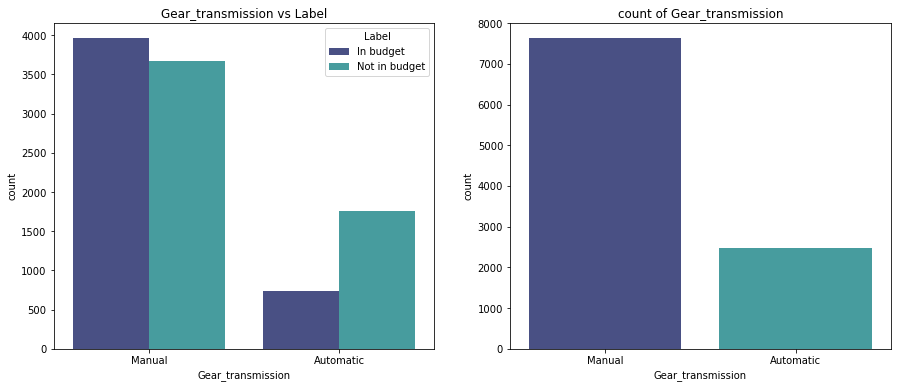

In [54]:
#check the relation between gear transmission and car price
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.countplot(x = 'Gear_transmission', hue = 'Label', data = df, palette="mako")
plt.title('Gear_transmission vs Label')
plt.subplot(1,2,2)
sns.countplot(df['Gear_transmission'],palette='mako')
plt.title('count of Gear_transmission')
plt.show()

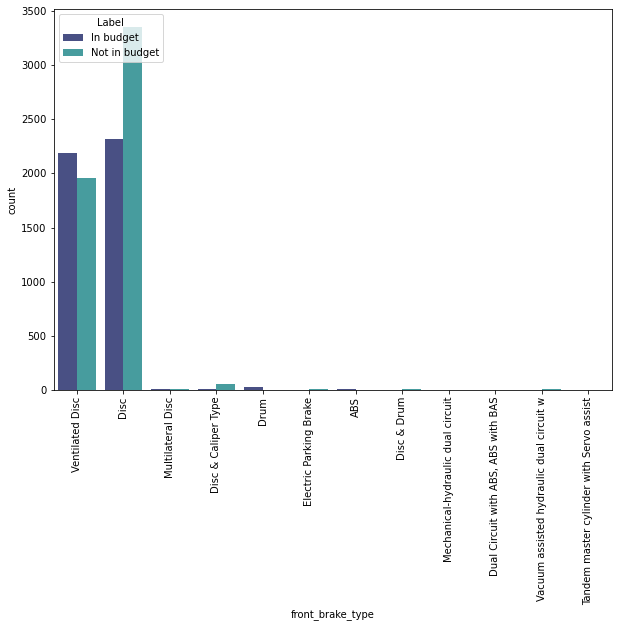

In [55]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'front_brake_type', hue = 'Label', data = df,palette='mako')
plt.xticks(rotation = 90)
plt.show()

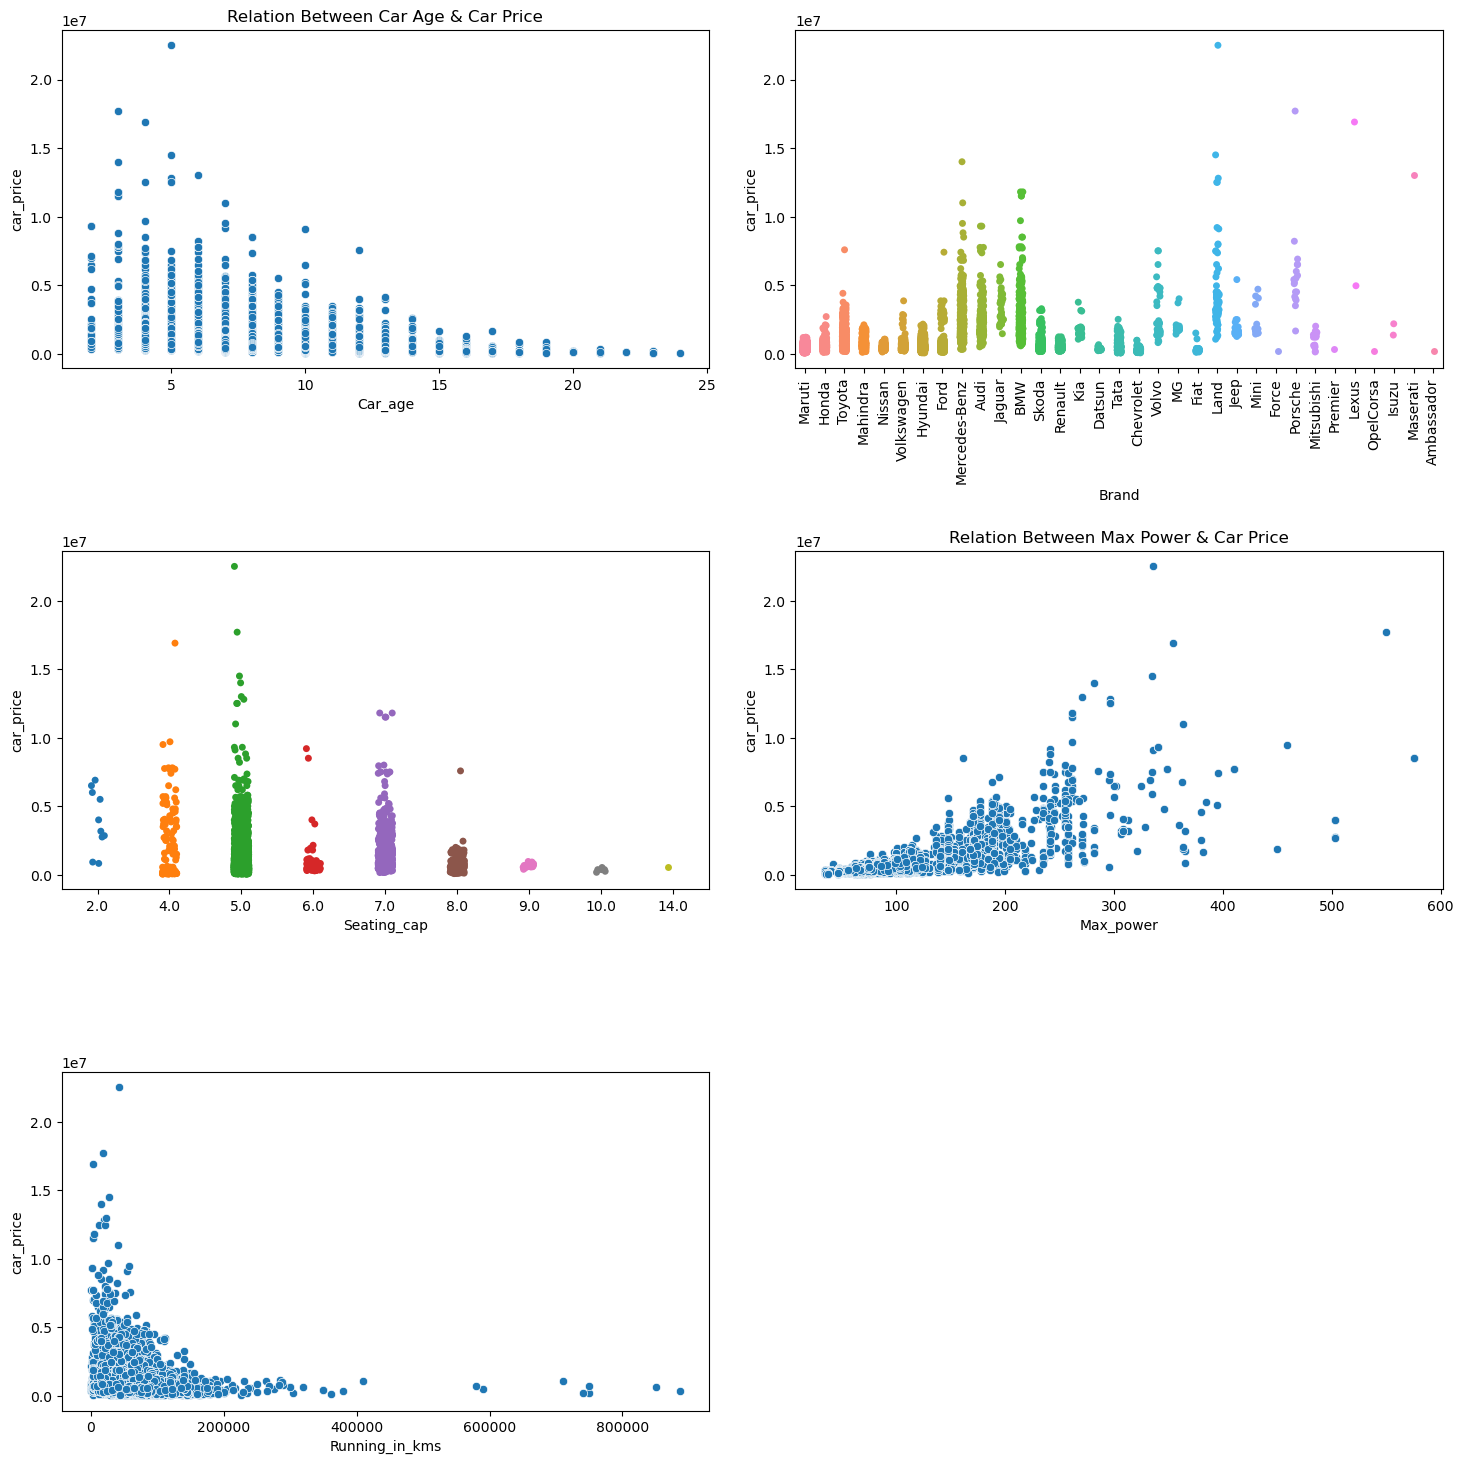

In [94]:
plt.figure(figsize = (15,15))
#plt.rcParams["figure.autolayout"] = True
plt.subplot(3,2,1)
sns.scatterplot(df.Car_age, df.car_price)
plt.title("Relation Between Car Age & Car Price")
plt.subplot(3,2,2)
sns.stripplot(df.Brand, df.car_price)
plt.xticks(rotation=90)

plt.subplot(3,2,3)
sns.stripplot(df.Seating_cap, df.car_price)
plt.subplot(3,2,4)
sns.scatterplot(df.Max_power, df.car_price)
plt.title("Relation Between Max Power & Car Price")

plt.subplot(3,2,5)
sns.scatterplot(df.Running_in_kms, df.car_price)
plt.tight_layout(pad=2.0)
plt.show()
#Brand Max_power



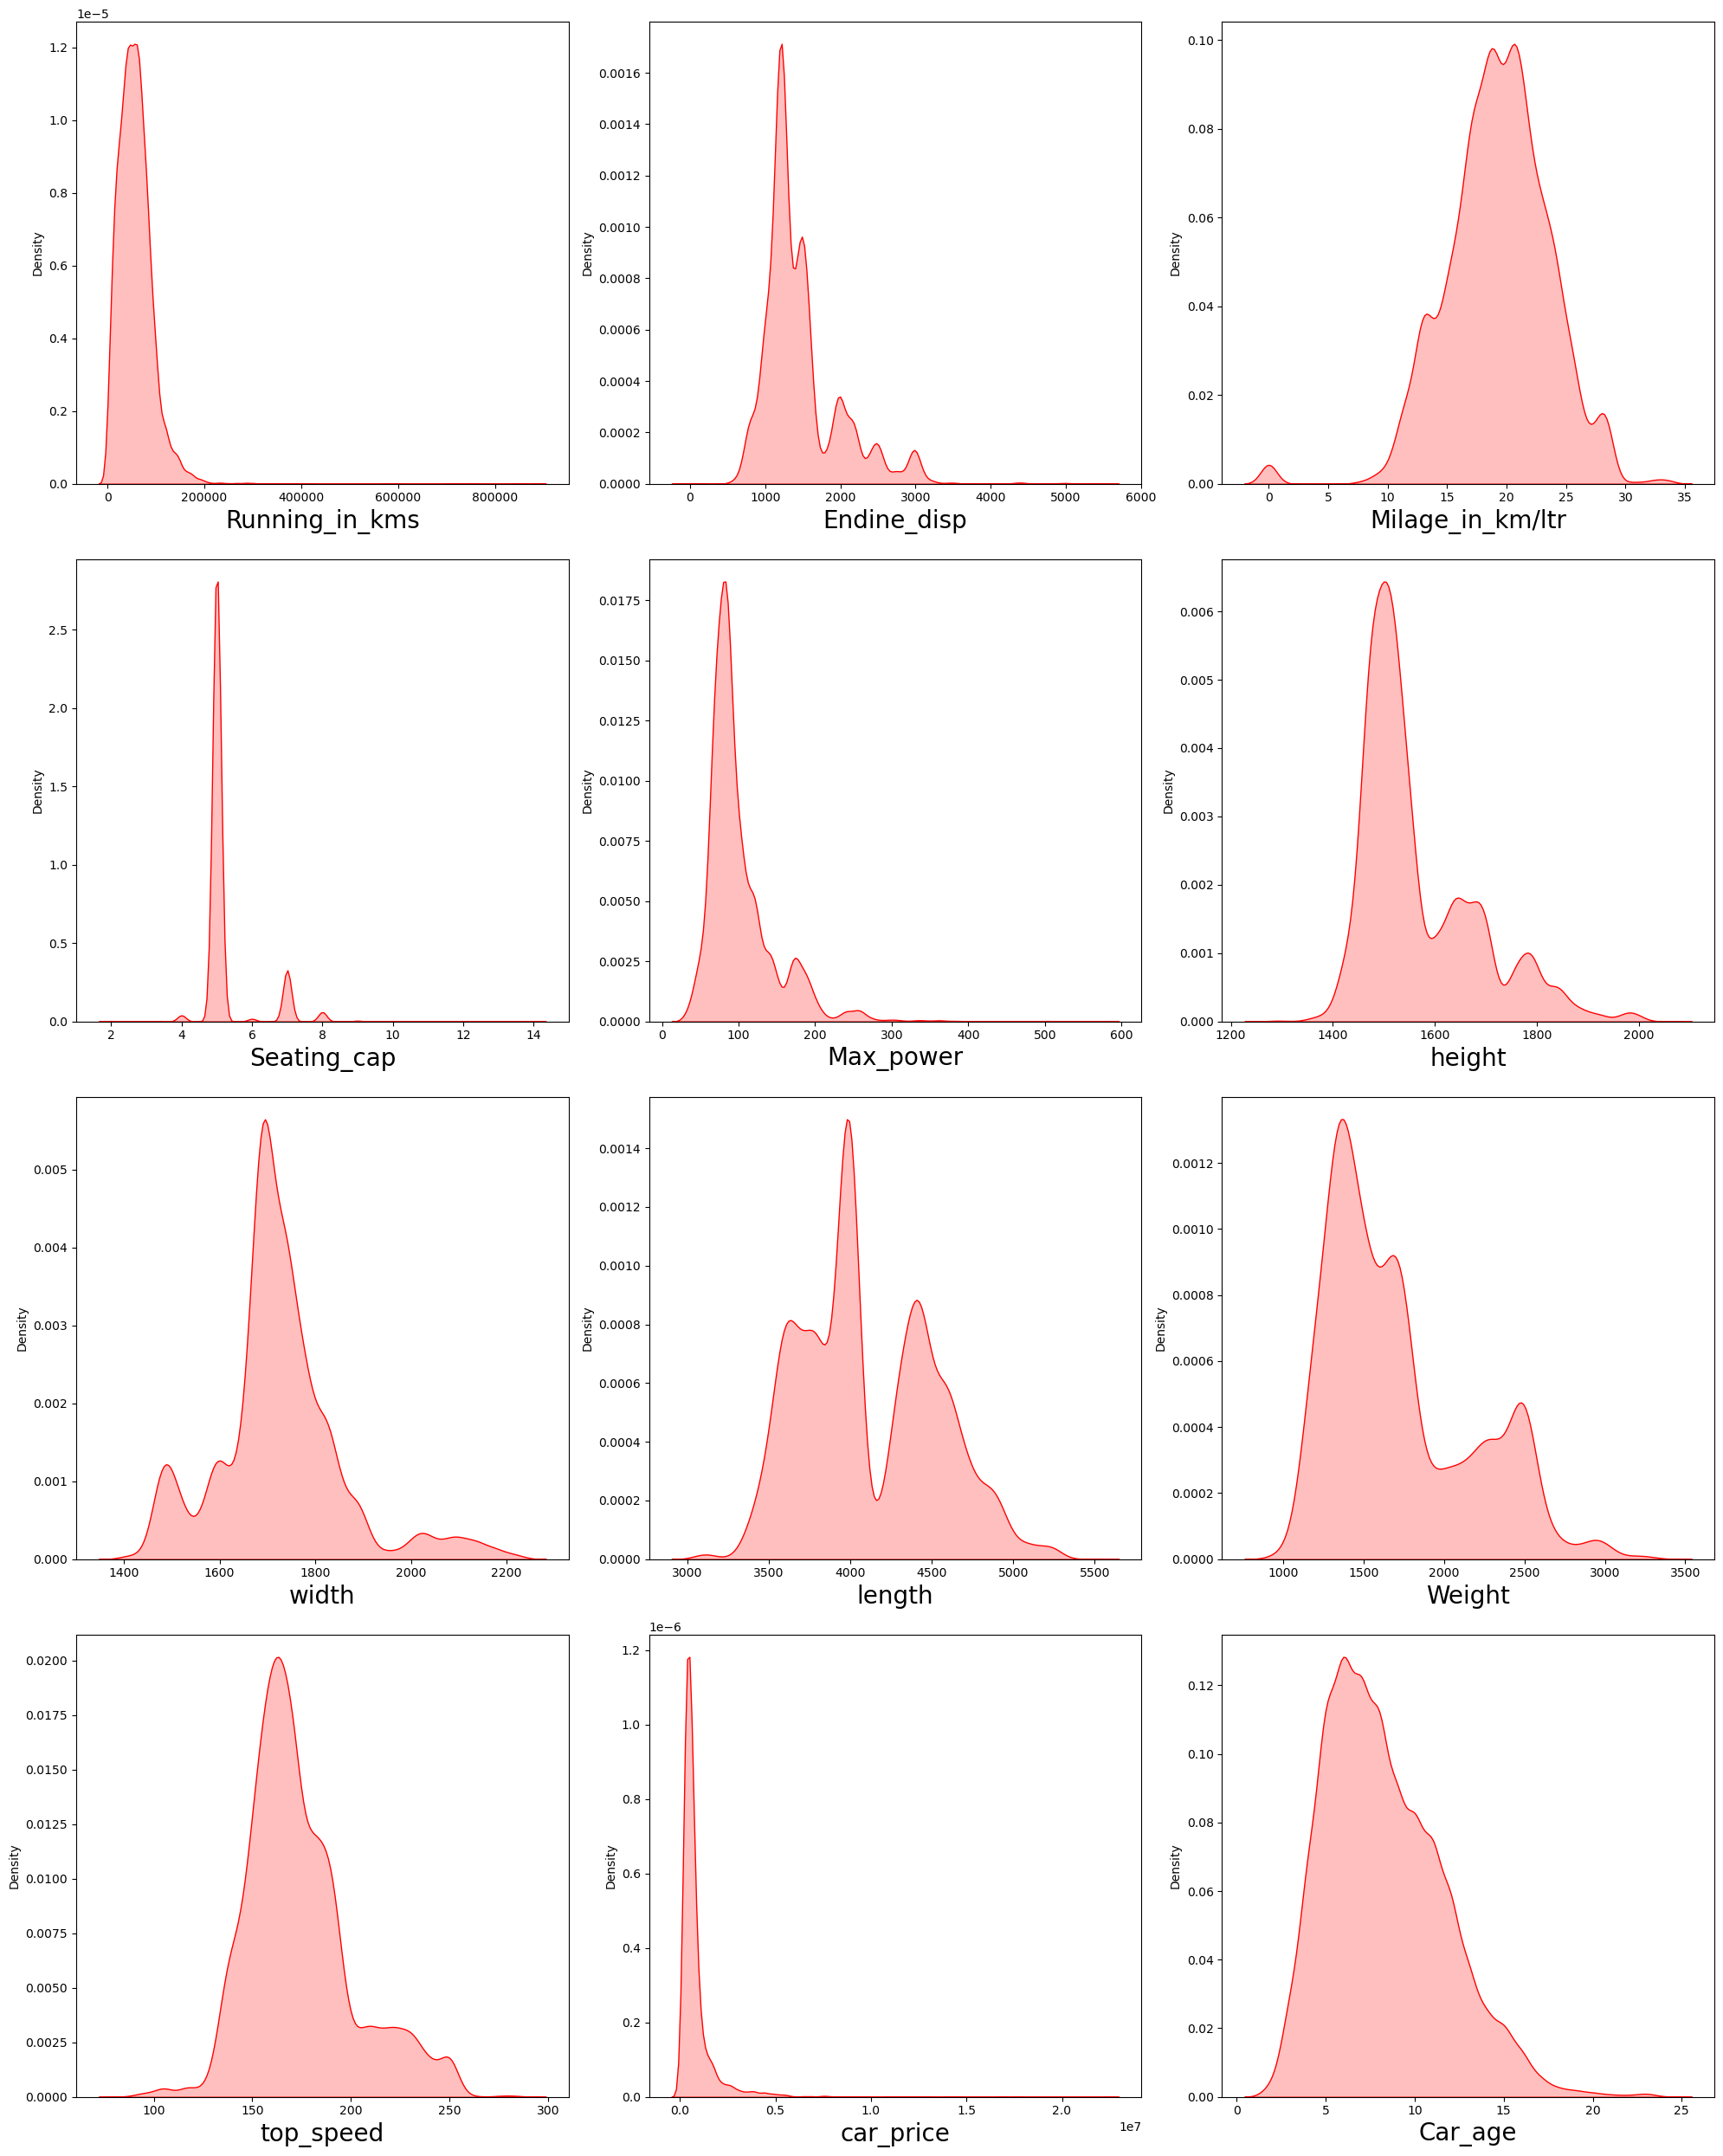

In [86]:
#Lets have a look on distribution of our data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

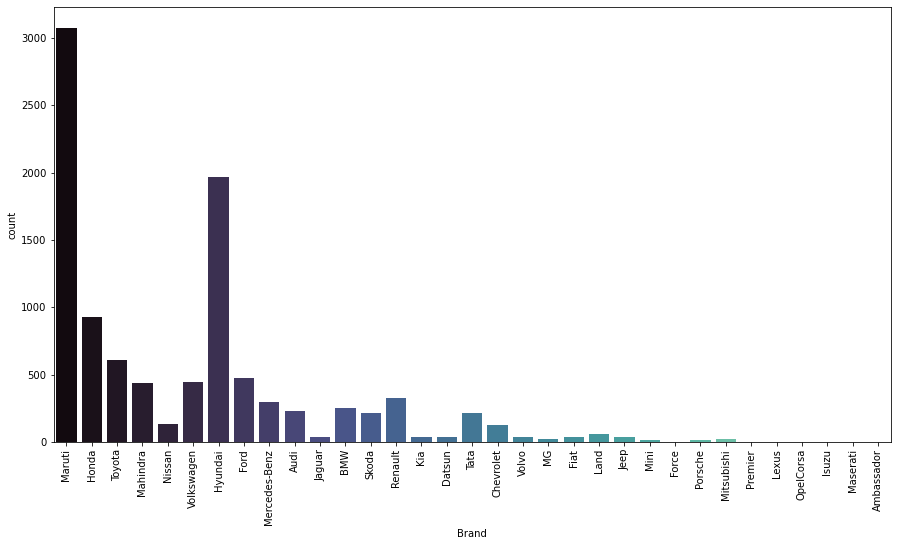

In [56]:
plt.figure(figsize = (15,8))
sns.countplot(df.Brand, palette="mako")
plt.xticks(rotation = 90)
plt.show()

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Running_in_kms,10117.0,57725.444104,3.949514e+04,472.0,33000.0,54000.00,75461.0,886253.00
Endine_disp,10078.0,1472.254515,5.187605e+02,0.0,1197.0,1248.00,1582.0,5461.00
Milage_in_km/ltr,10116.0,19.278136,4.320714e+00,0.0,16.8,19.34,22.0,33.54
Seating_cap,10061.0,5.250770,7.524847e-01,2.0,5.0,5.00,5.0,14.00
Max_power,9977.0,102.185857,4.572912e+01,34.2,74.0,88.50,117.3,575.00
height,9905.0,1568.167794,1.144004e+02,1281.0,1485.0,1530.00,1640.0,2050.00
width,9904.0,1724.448203,1.316948e+02,1410.0,1680.0,1701.50,1777.0,2220.00
length,9905.0,4108.221605,4.122901e+02,3099.0,3765.0,3995.00,4440.0,5453.00
Weight,5242.0,1715.181038,4.458306e+02,1000.0,1350.0,1595.00,2005.0,3300.00
top_speed,6697.0,173.848290,2.701989e+01,86.0,156.0,170.00,186.0,285.00


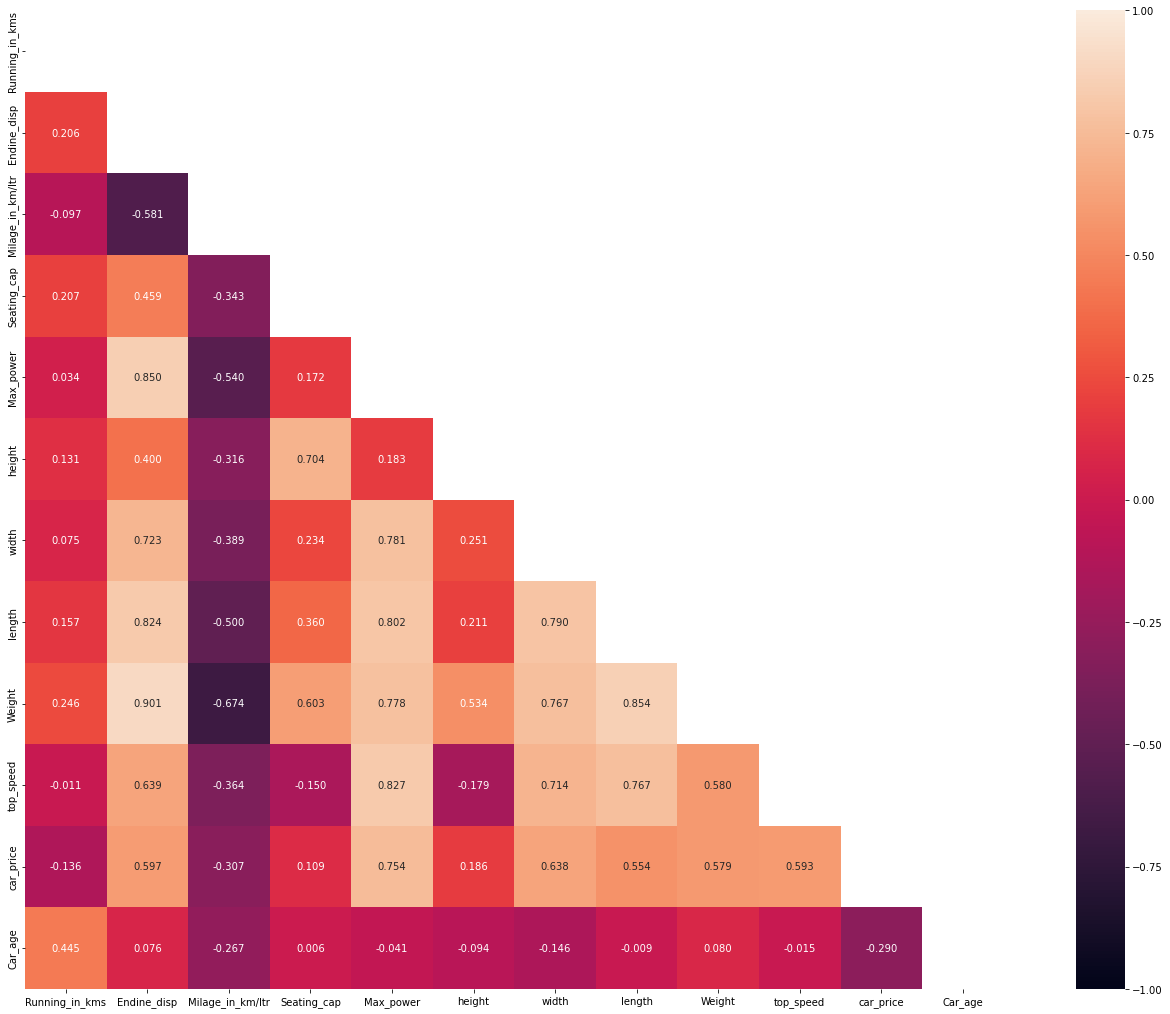

In [57]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10},mask=upper_triangle)
plt.show()

## Filling Missing values

In [58]:
for col in ['Endine_disp','Milage_in_km/ltr','Max_power','height','width','length','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

In [59]:
df.head()

,Fuel_type,Running_in_kms,color,Car_price,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,Max_power,front_brake_type,...,length,Weight,top_speed,car_price,Label,car_names,Brand,Model,city_name,Car_age
0,Petrol,89579.0,White,1.77 Lakh,998.0,Manual,20.92,5.0,67.10,Ventilated Disc,...,3620.0,1185.000000,173.84829,177000.0,In budget,Maruti Alto K10,Maruti,Alto K10,ahmedabad,11.0
1,Petrol,81674.0,White,3.6 Lakh,998.0,Manual,21.79,5.0,67.05,Disc,...,3655.0,1340.000000,173.84829,360000.0,In budget,Maruti Wagon R,Maruti,Wagon R,ahmedabad,7.0
2,Petrol,38647.0,Other,3.99 Lakh,1497.0,Manual,17.00,5.0,115.64,Disc,...,4420.0,1715.181038,173.84829,399000.0,In budget,Honda City,Honda,City,ahmedabad,12.0
3,Petrol,9718.0,White,6.65 Lakh,1197.0,Manual,21.21,5.0,81.80,Disc,...,3995.0,1315.000000,173.84829,665000.0,Not in budget,Maruti Swift Dzire,Maruti,Swift Dzire,ahmedabad,4.0
4,Petrol,57341.0,White,2.79 Lakh,1196.0,Manual,16.11,5.0,72.42,Disc,...,3675.0,1510.000000,173.84829,279000.0,In budget,Maruti Eeco,Maruti,Eeco,ahmedabad,11.0


In [60]:
X = df.drop(columns=['car_price','Car_price','Label'], axis = 1)
y = df['Label']

In [61]:
# label encoder for target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [62]:
#Encoding all attributes using get_dummies
X = pd.get_dummies(X, drop_first = True)
X = X.values

#### We did required data processing

##### Now we will test our algorithms on this Dataset.

In [63]:
def TrainTestSplit(X,y,test_size,random_state=None):
    np.random.seed(random_state)    #Random Number Generator
    permuted_indices = np.random.permutation(len(X))     #Shuffling indexes  
    test_size = int(test_size * len(X))
    test_indices = permuted_indices[:test_size]
    train_indices = permuted_indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [64]:

def accuracy_score(y_true, y_pred):
    TP = sum(y_true & y_pred)
    FP = sum(1-y_true & y_pred ) 
    TN = sum(1-y_true & 1-y_pred)
    FN = sum(y_true & 1-y_pred)
    return (TP+TN)/(TP+TN+FP+FN)

def precision(y_true,y_pred):
    TP = sum(y_true & y_pred) 
    FP = sum(1-y_true & y_pred )
    
    return (TP/(TP+FP))

def recall(y_true, y_pred):
    TP = sum(y_true & y_pred)
    FN = sum(y_true & 1-y_pred)
    return ((TP)/(TP+FN))

def f1_score(y_true, y_pred):
    Recall = recall(y_true, y_pred)
    Precision = precision(y_true, y_pred)
    
    return 2*(Recall*Precision)/(Recall+Precision)

In [65]:
#train_test_split
x_train, x_test, y_train, y_test = TrainTestSplit(X,y,test_size = 0.25,random_state = 0)

In [66]:

dt=DecisionTreeClassifier()

In [67]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
pred = dt.predict(x_test)

In [69]:
accuracy_score(y_test,pred)

0.918940292605773

In [70]:
recall(y_test,pred)

0.9383815887156645

## CART1

In [71]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier1:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
        else:
            # find the best split
            best_feature, best_thresh = self._best_split(X, y, feat_idxs)
            
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity 

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X_column, thr)

                if gain!=0 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold
    

    def impurity_gain(self, y, X_column, threshold):
        '''Calculates impurity for particular split'''
        # create subsets
        left_subset, right_subset = self._split(X_column, threshold)

        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_subset), len(right_subset)
        gini_l, gini_r = self.gini_index(y[left_subset]), self.gini_index(y[right_subset])
        
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
        
    #function to split data into two parts
    def _split(self, X, split_thresh):
        '''Splits data based on the threshold value'''
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        right_idxs = np.argwhere(X > split_thresh).flatten()
        return  left_idxs, right_idxs

    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART2

In [72]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier2:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity 

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    #print("best_thresh", best_feature,best_thresh)
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) >= 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X_column, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                    #print('thr',split_idx,split_threshold)
        #print(best_gain,split_threshold,split_idx)

        return split_idx, split_threshold
    

    def impurity_gain(self, y, X_column, threshold):
        '''Calculates impurity for particular split'''
        # create subsets
        left_subset, right_subset = self._split(X_column, threshold)

        if len(left_subset) == 0 or len(right_subset) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        n = len(y)
        n_left, n_right = len(left_subset), len(right_subset)
        gini_l, gini_r = self.gini_index(y[left_subset]), self.gini_index(y[right_subset])
        
        return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
       # return (len(left_subset)/len(y))*self.gini_index(y[left_subset]) + ((len(right_subset)/len(y))*self.gini_index(y[right_subset]))
    
    #function to split data into two parts
    def _split(self, X, split_thresh):
        '''Splits data based on the threshold value'''
        left_idxs = np.argwhere(X <= split_thresh).flatten()
        right_idxs = np.argwhere(X > split_thresh).flatten()
        return  left_idxs, right_idxs

    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART3

In [73]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier3:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
   # def gini_index(self,labels):
       # counts = np.bincount(labels)
        #probabilities = counts / len(labels)
        #return 1 - np.sum(probabilities**2)
    def gini_index(self, y):
        n_samples = len(y)
        counts = np.unique(y, return_counts=True)[1]
        impurity = 1
        for count in counts:
            prob = count / n_samples
            impurity -= prob ** 2
        return impurity

    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) > 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
                #print(thresholds)
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X,feat_idx, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                  
        return split_idx, split_threshold
    

    def impurity_gain(self, y,X, feat, threshold):
        '''Calculates impurity for particular split'''
        left_y = y[X[:, feat] <= threshold]
        right_y = y[X[:, feat] > threshold]

        if len(left_y) == 0 or len(right_y) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        #n = len(y)
        #n_left, n_right = len(left_y), len(right_y)
        #gini_l, gini_r = self.gini_index(left_y), self.gini_index(right_y)
        #return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
        return (len(left_y)/len(y))*self.gini_index(left_y) + ((len(right_y)/len(y))*self.gini_index(right_y))
    
    
    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

## CART4

In [74]:

class Node:
    '''This Class will store the data related to the specific Nodes'''
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        '''Function to check whether the tree reached to its leaf Node'''
        return self.value is not None


class DecisionTreeClassifier4:
    '''this class will take training data and build the tree using different methods'''
    def __init__(self, min_samples_split=2, max_depth=6, n_features=100):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
    
    def fit(self, X, y):
        '''fits the data into a tree structure'''
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)
        
    #function to grow the tree from node
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
       # print('samples',n_samples,n_feats,self.n_features)
        n_labels = len(np.unique(y))
        
        # check the stopping criteria
        if (depth>=self.max_depth or n_labels<=1 or n_samples<self.min_samples_split):
            return  Node(value = np.bincount(y).argmax())#Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)
        
       
       # print('feat_idxs',feat_idxs)
        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)
        if best_thresh == None or best_feature == None:
            return Node(value = np.bincount(y).argmax())
        #print(best_feature,best_thresh)
        
        # create child nodes
        left_idxs = X[:, best_feature] <= best_thresh
        right_idxs = X[:, best_feature] > best_thresh
        #print(left_idxs,right_idxs,depth)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)
    
    def gini_index(self,labels):
        counts = np.bincount(labels)
        probabilities = counts / len(labels)
        return 1 - np.sum(probabilities**2)
    
    def _best_split(self, X, y, feat_idxs):
        best_gain = 1
        split_idx, split_threshold = None, None
        if len(X) <= 2:
            for feat_idx in feat_idxs:
               # print(feat_idx)
                X_column = X[:, feat_idx]
                #print(X_column)
                thresholds = np.unique(X_column)
                if len(thresholds) == 2:
                    best_feature = feat_idx
                    best_thresh = thresholds[0]
                    return best_feature, best_thresh

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thr = np.unique(X_column)
            
            if len(thr) > 2 and len(thr) <=5:
                thresholds = thr
            else:
                thresholds = np.unique(X_column.mean())
                #print(thresholds)
    
            for thr in thresholds:
                # calculate the information gain
                gain = self.impurity_gain(y, X,feat_idx, thr)
                #print(gain)

                if gain!=0 and gain !=1 and gain < best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
                  
        return split_idx, split_threshold
    

    def impurity_gain(self, y,X, feat, threshold):
        '''Calculates impurity for particular split'''
        left_y = y[X[:, feat] <= threshold]
        right_y = y[X[:, feat] > threshold]

        if len(left_y) == 0 or len(right_y) == 0:
            return 0
        
        # calculate the gini impurity of each subset
        #n = len(y)
        #n_left, n_right = len(left_y), len(right_y)
        #gini_l, gini_r = self.gini_index(left_y), self.gini_index(right_y)
        #return (n_left/n)*gini_l + (n_right/n)*gini_r  #returning impurity gain for particular split
        return (len(left_y)/len(y))*self.gini_index(left_y) + ((len(right_y)/len(y))*self.gini_index(right_y))
    
    def predict(self, X):
        '''Taking each row from test data and makes predictions'''
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        '''Passing over the data points till end point/ leaf node'''
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
        

In [75]:
cart1=DecisionTreeClassifier1()
cart2=DecisionTreeClassifier2()
cart3=DecisionTreeClassifier3()
cart4=DecisionTreeClassifier4()
dt=DecisionTreeClassifier()

models={
    "CART_Classifier1":cart1,
    "CART_Classifier2":cart2,
    "CART_Classifier3":cart3,
    "CART_Classifier4":cart4,
    "DecisionTreeClassifier":dt
}

In [76]:
#model building and evaluation
modl = []
accuracy = []
preci = []
recall_ = []
f1 = [] 
tim = []
for name, model in models.items():
    #print("***********************************",name,"******************************************")
    start = time.time()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    modl.append(name)
    accuracy.append(round(accuracy_score(y_test,pred)*100,2))
    preci.append(round(precision(y_test,pred)*100,2))
    recall_.append(round(recall(y_test,pred)*100,2))
    f1.append(round(f1_score(y_test,pred)*100,2))
    tim.append(time.time()-start)
    
data = list(zip(modl,accuracy,preci,recall_,f1,tim))
result_table = pd.DataFrame(data,columns =["Algorithm","Accuracy in %","Precision in %","Recall","F1_score","Time in Sec"])
result_table

,Algorithm,Accuracy in %,Precision in %,Recall,F1_score,Time in Sec
0,CART_Classifier1,90.27,89.92,92.06,90.98,12.661029
1,CART_Classifier2,81.89,79.00,89.90,84.10,0.687341
2,CART_Classifier3,87.47,88.09,88.42,88.25,0.593611
3,CART_Classifier4,86.24,85.76,88.94,87.32,0.593607
4,DecisionTreeClassifier,91.81,91.24,93.62,92.41,0.437397


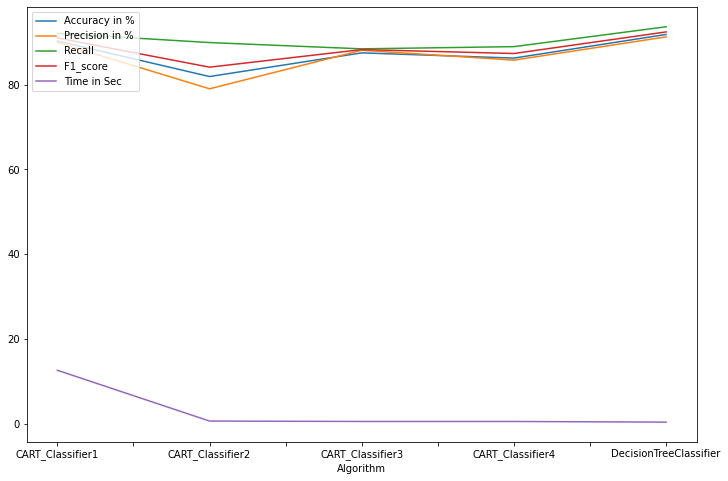

In [77]:
ax = result_table.plot.line(figsize=(12,8),x='Algorithm')
plt.legend(loc =2)

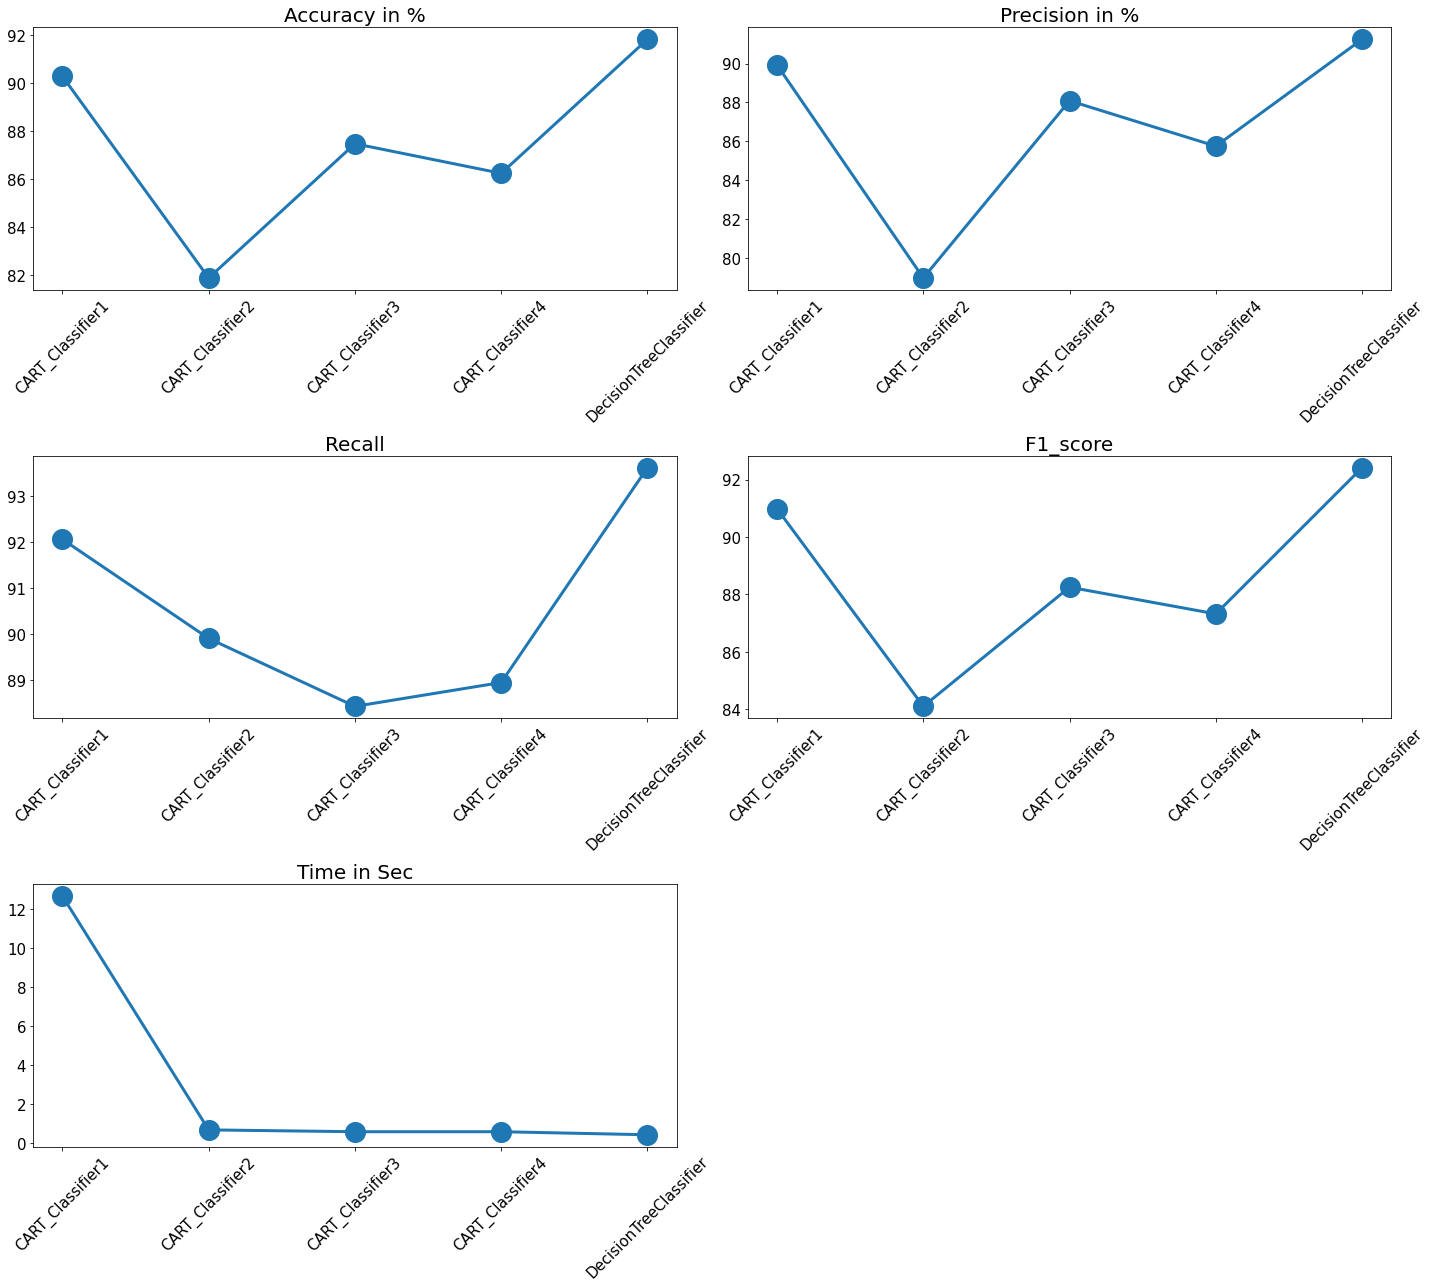

In [78]:
col=['Accuracy in %','Precision in %','Recall','F1_score','Time in Sec']
plt.figure(figsize=(20,18))
for i in range(len(col)):
    plt.subplot(3,2,i+1)
    plt.plot(result_table['Algorithm'],result_table[col[i]],linewidth=3, marker = 'o', markersize = 20)
    plt.title(col[i],fontsize=20)
    plt.xticks(rotation = 45)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

## Loading Credit Record Data

In [2]:
df1 = pd.read_csv("credit_record.csv")
df2 = pd.read_csv("application_record.csv")
print(df1.shape)
print(df2.shape)

(1048575, 3)
(438557, 18)


In [3]:
df1.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
df2.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
df = pd.merge(df1, df2, on=['ID'], how='inner')
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [6]:
df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [8]:
df.shape

(777715, 20)

In [7]:
df.isna().sum()

ID                          0
MONTHS_BALANCE              0
STATUS                      0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [10]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64